In [38]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("clean_data_0.csv")

# Display unique values for categorical columns
categorical_cols = [
    "Type of property", "Subtype of property", "Type of sale",
    "State of building", "Locality name", "Equipped kitchen",
    "Furnished", "Open fire", "Garden", "Terrace", "Swimming pool",
    "Number of facades", "Number of rooms"
]

for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    display(pd.DataFrame(df[col].unique(), columns=[col]))
    print("----------------------------------")

# --------------------------------------------------------------------------------
#  IQR Outlier Detection Function
def detect_outliers_iqr(data, col):
    Q1 = data[col].dropna().quantile(0.25)
    Q3 = data[col].dropna().quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f"\nColumn: {col}")
    print(f"Number of outliers: {len(outliers)}")
    display(outliers[[col]])
    print("-------------------------------------")
    return outliers
# -------------------------------------------------------------------------------
# Run IQR on numeric columns
columns_to_check = ['Price', 'Number of rooms', 'Number of facades']

outliers_dict = {}  

for col in columns_to_check:
    outliers_dict[col] = detect_outliers_iqr(df, col)
# ---------------------------------------------------------------------------------

#Detailed info for Price Outliers (using stored result)
price_outliers = df[df['Price'].isin(outliers_dict['Price']['Price'])]
price_outliers_info = price_outliers[
    ['Type of property', 'Subtype of property', 'Number of rooms',
     'Price', 'Living area', 'Garden', 'Terrace', 'State of building']
]
print("\n=== Price Outliers: Detailed Information ===")
display(price_outliers_info)
# -------------------------------------------------------------------------------------

# Properties with more than 7 rooms
rooms_gt_7 = df[df['Number of rooms'] > 7]
rooms_gt_7_info = rooms_gt_7[
    ['Type of property', 'Subtype of property', 'Number of rooms',
     'Price', 'Living area', 'Garden', 'Terrace', 'State of building']
]
print("\n=== Properties with more than 7 rooms ===")
display(rooms_gt_7_info)
#========================================================================================



Unique values in 'Type of property':


,Type of property
0,House
1,Appartment
2,Type of property


----------------------------------

Unique values in 'Subtype of property':


,Subtype of property
0,Villa
1,House
2,Flat
3,MasterHouse
4,MixedBuilding
5,FlatStudio
6,Bungalow
7,Duplex
8,Penthouse
9,Cottage


----------------------------------

Unique values in 'Type of sale':


,Type of sale
0,Sale
1,Type of sale


----------------------------------

Unique values in 'State of building':


,State of building
0,Normal
1,Unknown
2,To be renovated
3,To renovate
4,Excellent
5,Fully renovated
6,New
7,To restore
8,Under construction
9,To demolish


----------------------------------

Unique values in 'Locality name':


,Locality name
0,Seneffe
1,Hennuyères
2,La Louvière
3,Solre-sur-Sambre
4,Mons
...,...
1174,Ganshoren
1175,Haren
1176,Berchem-Sainte-Agathe
1177,Evere


----------------------------------

Unique values in 'Equipped kitchen':


,Equipped kitchen
0,1
1,0


----------------------------------

Unique values in 'Furnished':


,Furnished
0,0
1,1


----------------------------------

Unique values in 'Open fire':


,Open fire
0,0
1,1


----------------------------------

Unique values in 'Garden':


,Garden
0,1
1,0


----------------------------------

Unique values in 'Terrace':


,Terrace
0,1
1,0


----------------------------------

Unique values in 'Swimming pool':


,Swimming pool
0,0
1,1


----------------------------------

Unique values in 'Number of facades':


,Number of facades
0,4.0
1,2.0
2,3.0
3,NaN
4,1.0


----------------------------------

Unique values in 'Number of rooms':


,Number of rooms
0,4.0
1,2.0
2,3.0
3,1.0
4,5.0
5,6.0
6,7.0
7,11.0
8,NaN
9,8.0


----------------------------------

Column: Price
Number of outliers: 508


,Price
194,850000.0
216,1750000.0
337,800000.0
541,1895000.0
544,1895000.0
...,...
7265,800000.0
7266,4850000.0
7267,3050000.0
7268,3050000.0


-------------------------------------

Column: Number of rooms
Number of outliers: 72


,Number of rooms
58,11.0
86,8.0
99,20.0
194,8.0
675,8.0
...,...
6411,9.0
7034,8.0
7194,8.0
7220,23.0


-------------------------------------

Column: Number of facades
Number of outliers: 0


,Number of facades


-------------------------------------

=== Price Outliers: Detailed Information ===


,Type of property,Subtype of property,Number of rooms,Price,Living area,Garden,Terrace,State of building
194,House,House,8.0,850000.0,245.0,1,1,Excellent
216,House,Cottage,7.0,1750000.0,NaN,1,1,Excellent
337,House,House,4.0,800000.0,330.0,1,1,Excellent
541,House,House,5.0,1895000.0,700.0,1,1,Excellent
544,House,House,5.0,1895000.0,700.0,1,1,Excellent
...,...,...,...,...,...,...,...,...
7265,Appartment,Flat,2.0,800000.0,227.0,0,1,Excellent
7266,House,House,7.0,4850000.0,1300.0,1,1,Normal
7267,House,Villa,4.0,3050000.0,560.0,1,1,Excellent
7268,House,Villa,4.0,3050000.0,560.0,1,1,Excellent



=== Properties with more than 7 rooms ===


,Type of property,Subtype of property,Number of rooms,Price,Living area,Garden,Terrace,State of building
58,House,MasterHouse,11.0,325000.0,746.0,1,1,To renovate
86,House,Villa,8.0,175000.0,385.0,1,1,To be renovated
99,House,House,20.0,549000.0,775.0,0,0,Normal
194,House,House,8.0,850000.0,245.0,1,1,Excellent
675,House,House,8.0,725000.0,418.0,1,1,Normal
...,...,...,...,...,...,...,...,...
6411,House,House,9.0,1450000.0,430.0,1,1,Excellent
7034,House,House,8.0,2690000.0,630.0,1,1,To be renovated
7194,House,MixedBuilding,8.0,795000.0,280.0,0,1,Normal
7220,House,MixedBuilding,23.0,1750000.0,720.0,0,1,To renovate


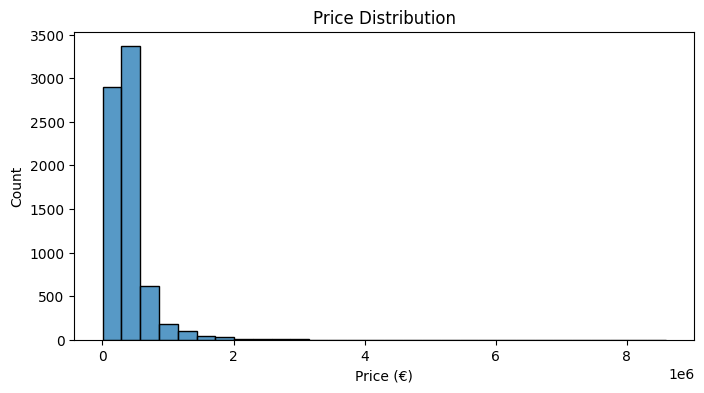

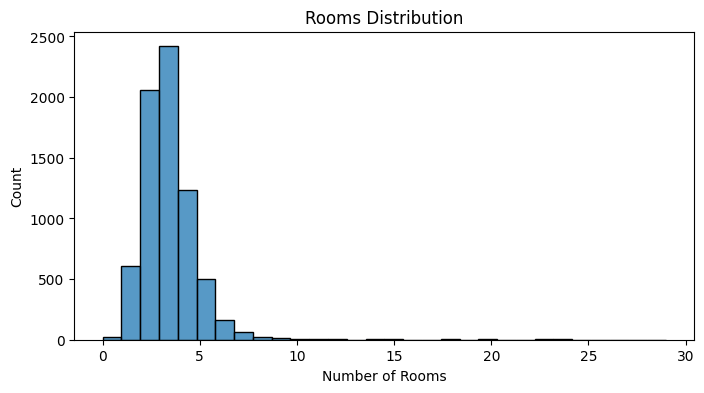

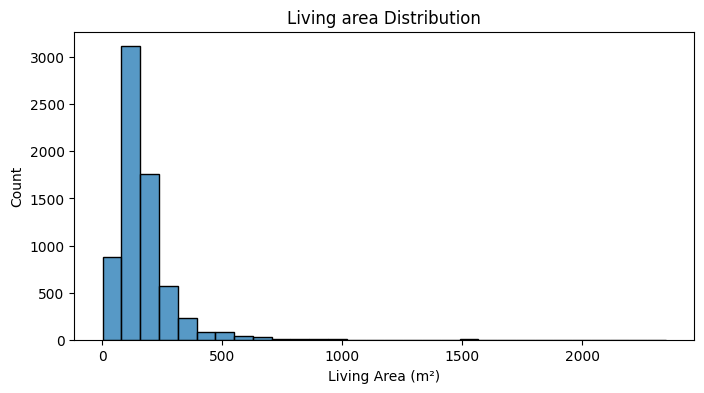

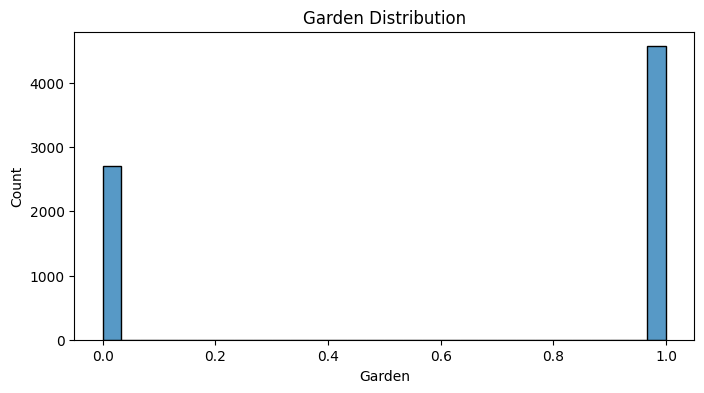

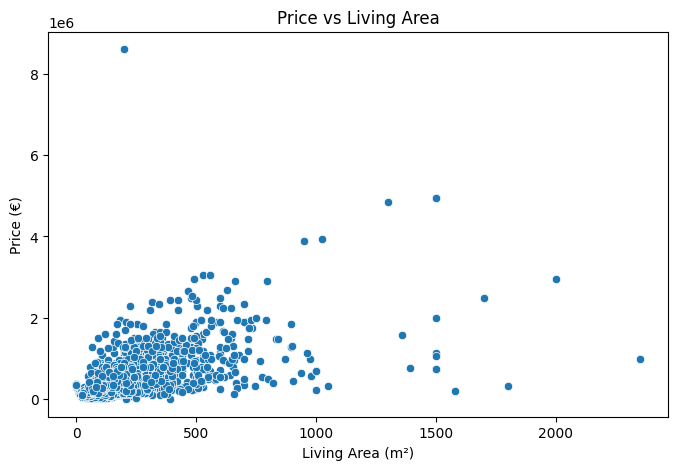

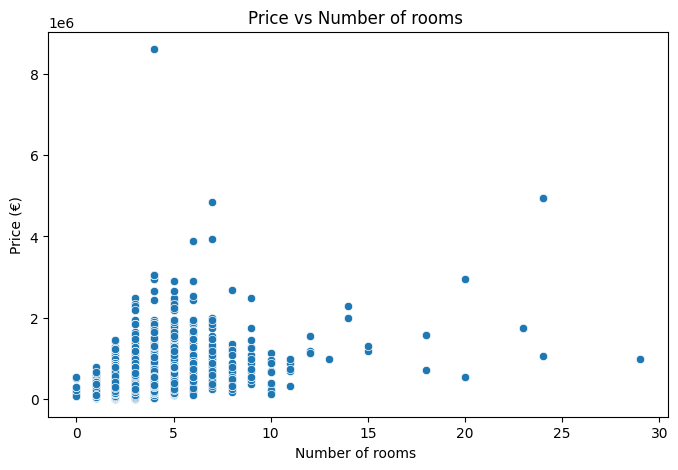

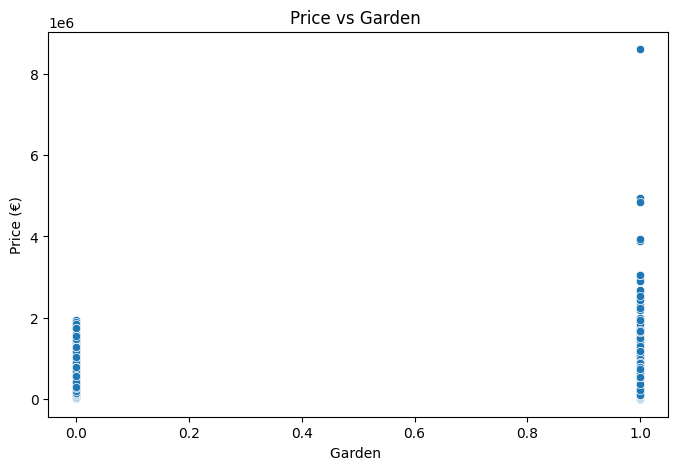

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ======= 1. HISTOGRAM لـ PRICE  Distribution =======
plt.figure(figsize=(8, 4))
sns.histplot(df["Price"], bins=30)
plt.title("Price Distribution")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.show()

# ======= 2. HISTOGRAM لـ Number of Rooms Distribution =======
plt.figure(figsize=(8, 4))
sns.histplot(df["Number of rooms"], bins=30)
plt.title("Rooms Distribution")
plt.xlabel("Number of Rooms")
plt.ylabel("Count")
plt.show()

# ======= 3. HISTOGRAM لـ lIVING AREA Distribution =======
plt.figure(figsize=(8, 4))
sns.histplot(df["Living area"], bins=30)
plt.title ("Living area Distribution")
plt.xlabel("Living Area (m²)")
plt.ylabel("Count")
plt.show()

# ======= 4. HISTOGRAM لـ Gareden = 1 Distribution =======
plt.figure(figsize=(8, 4))
sns.histplot(df["Garden"], bins=30)
plt.title ("Garden Distribution")
plt.xlabel("Garden")
plt.ylabel("Count")
plt.show()
#-----------------------------------------------------------------------------------
#    PRICE Vs ----- 

# ======= 1. SCATTER PLOT: PRICE vs LIVING AREA =======
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Living area", y="Price")
plt.title("Price vs Living Area")
plt.xlabel("Living Area (m²)")
plt.ylabel("Price (€)")
plt.show()

# ======= 1. SCATTER PLOT: PRICE vs Number of rooms  =======
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Number of rooms", y="Price")
plt.title("Price vs Number of rooms ")
plt.xlabel("Number of rooms ")
plt.ylabel("Price (€)")
plt.show()

# ======= 1. SCATTER PLOT: PRICE vs Garden   =======
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Garden", y="Price")
plt.title("Price vs Garden ")
plt.xlabel("Garden ")
plt.ylabel("Price (€)")
plt.show()





Correlation between Price and Living Area: 0.59


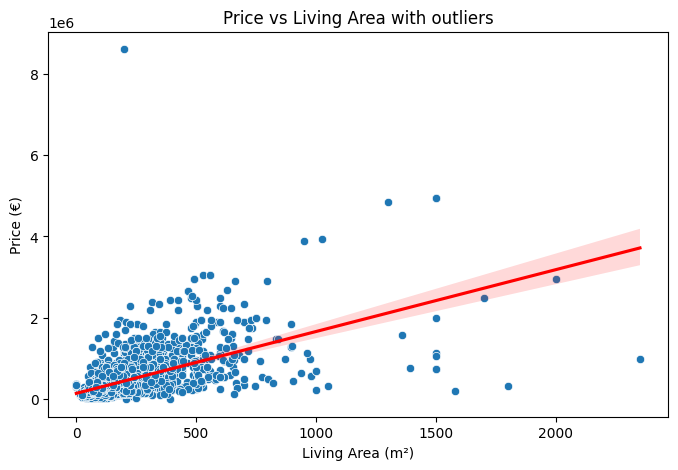

Correlation between Price and Number of rooms : 0.46


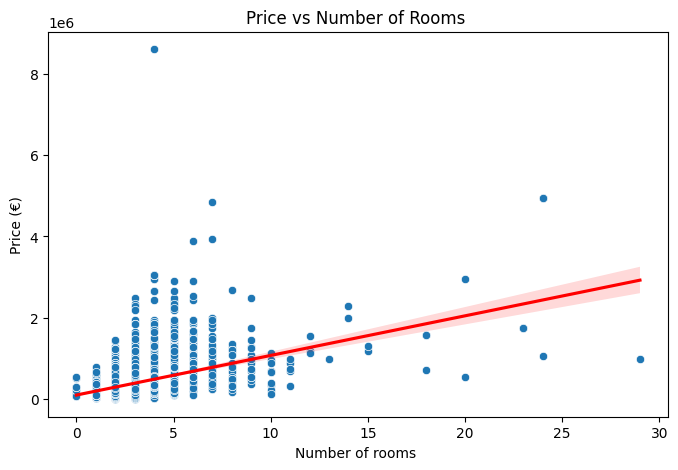

Correlation between Price and Garden: 0.18


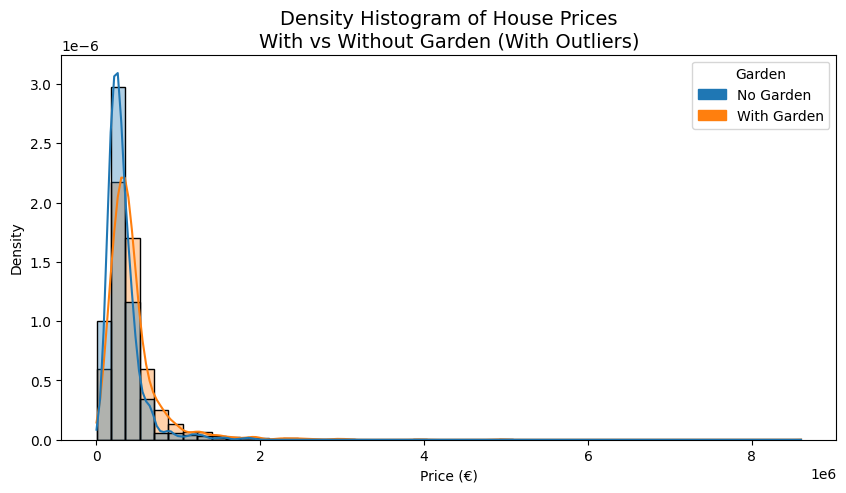

In [35]:
#-----------------------Questions for Analysis----- with outliers ------------------------#
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("clean_data_0.csv")
#  =====Price vs Living Area====
"""
1.Is there a relationship between the size of the property (living area) and its price?

2.Does the price increase as the living area increases?

3.Are there any extreme values (outliers) that deviate significantly from the general trend?
"""
correlation = df["Price"].corr(df["Living area"])

print(f"Correlation between Price and Living Area: {correlation:.2f}")

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Living area", y="Price")
sns.regplot(data=df, x="Living area", y="Price", scatter=False, color="red") 
plt.title("Price vs Living Area with outliers")
plt.xlabel("Living Area (m²)")
plt.ylabel("Price (€)")
plt.show()

#  =====Price vs number of rooms ====
"""
1.Is there a relationship between the number of rooms and  of the property ( and its price?

2.Does the price increase as the number of rooms  increases?

3.Are there any extreme values (outliers) that deviate significantly from the general trend?
"""
correlation =df["Price"].corr(df["Number of rooms"])

print(f"Correlation between Price and Number of rooms : {correlation:.2f}")

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Number of rooms", y="Price")
sns.regplot(data=df, x="Number of rooms", y="Price", scatter=False, color="red") 
plt.title("Price vs Number of Rooms ")
plt.xlabel("Number of rooms ")
plt.ylabel("Price (€)")
plt.show()


#===============Price vs Garden Availability================
"""
1.Do properties with a garden generally have higher prices than those without?

2.Is there a clear difference in price between properties with and without a garden?

3.Are there any outliers affecting the observed trend?
"""
# Price vs Garden
correlation_garden = df["Price"].corr(df["Garden"])
print(f"Correlation between Price and Garden: {correlation_garden:.2f}")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

# 1) Use the original dataset WITH outliers
df_plot = df.copy()

# 2) Convert Garden to readable labels
label_map = {0: "No Garden", 1: "With Garden"}
df_plot["Garden_label"] = df_plot["Garden"].map(label_map).astype("category")

# 3) Colors for the distributions
palette = {"No Garden": "tab:blue", "With Garden": "tab:orange"}

# 4) Shared bins for BOTH groups → Ensures same X-scale
min_price = df_plot["Price"].min()
max_price = df_plot["Price"].max()
bins = np.linspace(min_price, max_price, 50)

# 5) Plot
plt.figure(figsize=(10,5))

sns.histplot(
    data=df_plot,
    x="Price",
    hue="Garden_label",
    bins=bins,
    kde=True,
    stat="density",      # same Y-scale
    alpha=0.35,
    palette=palette,
    common_norm=False    # each group's density is correct
)

# 6) Title + axes
plt.title("Density Histogram of House Prices\nWith vs Without Garden (With Outliers)", fontsize=14)
plt.xlabel("Price (€)")
plt.ylabel("Density")

# 7) Custom legend
handles = [
    mpatches.Patch(color=palette[name], label=name)
    for name in ["No Garden", "With Garden"]
]
plt.legend(handles=handles, title="Garden")

plt.show()




Correlation Price vs Living Area (without outliers): 0.49
Correlation Price vs Garden (without outliers): 0.18


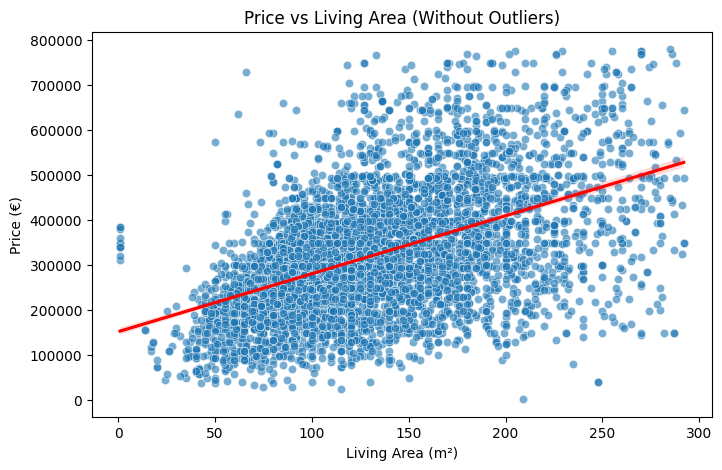

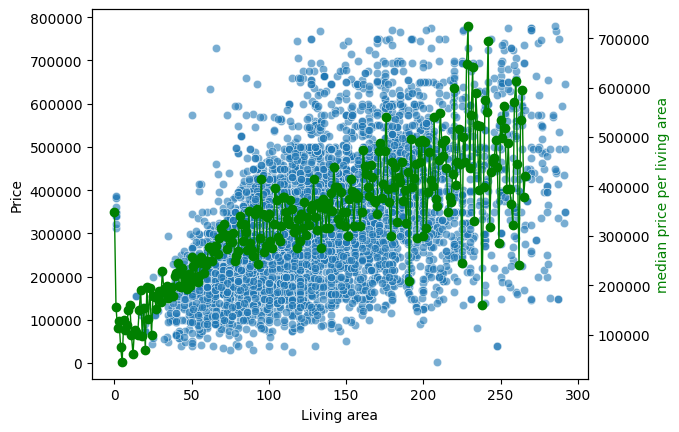

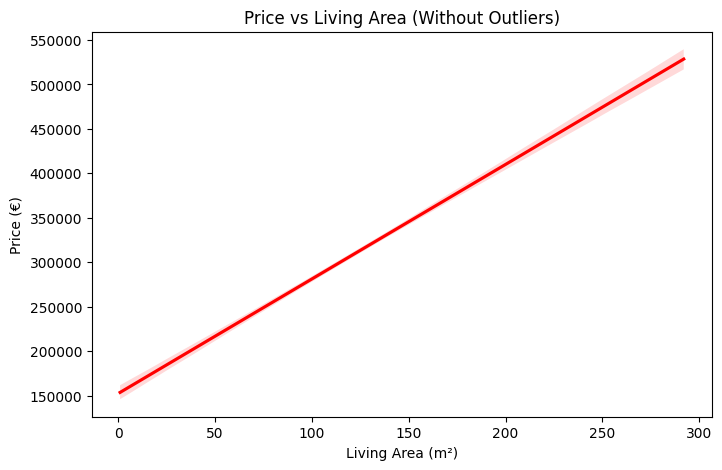

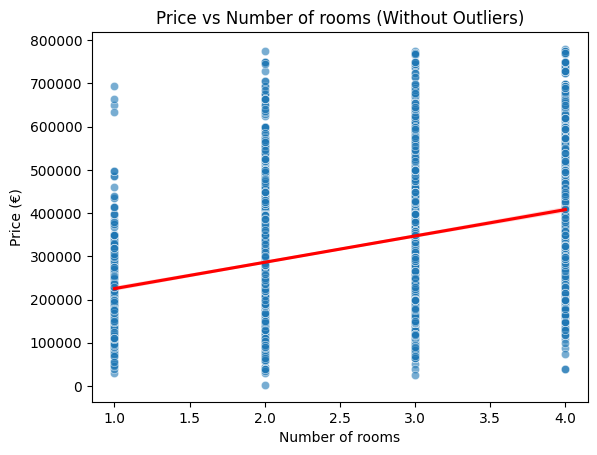

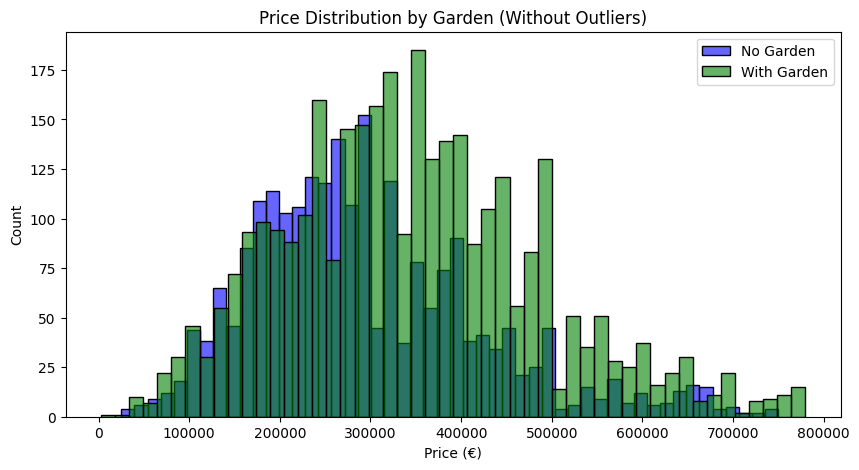

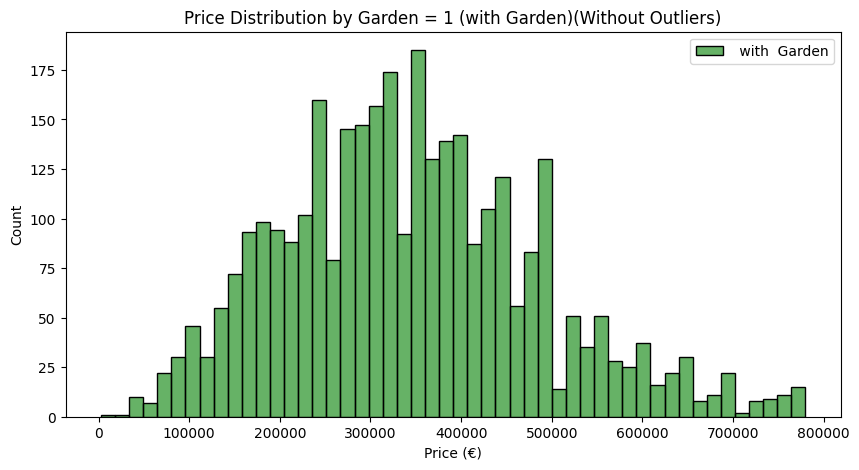

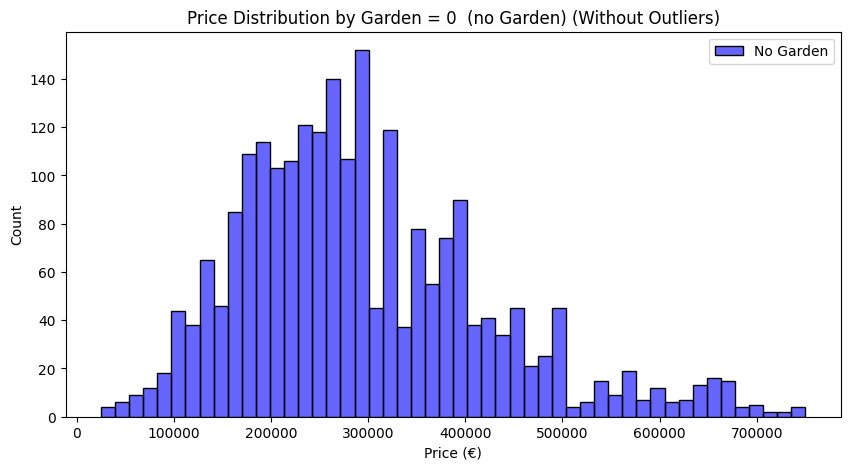


Analysis Notes (Without Outliers):

1. Price vs Living Area
- Removing extreme values makes the linear trend clearer.
- Positive correlation remains (~0.59), indicating that price generally increases with larger living area.

2. Price vs Garden Availability
- Outliers can skew the perceived effect of having a garden.
- After removing outliers, it is easier to see that properties with a garden generally have higher prices.
- The scatter plot with trend line shows the difference in average price between the two groups.

Recommendation:
- Use these cleaned plots in reports to show clearer trends without distortion from extreme values.



<Axes: xlabel='Price', ylabel='Density'>

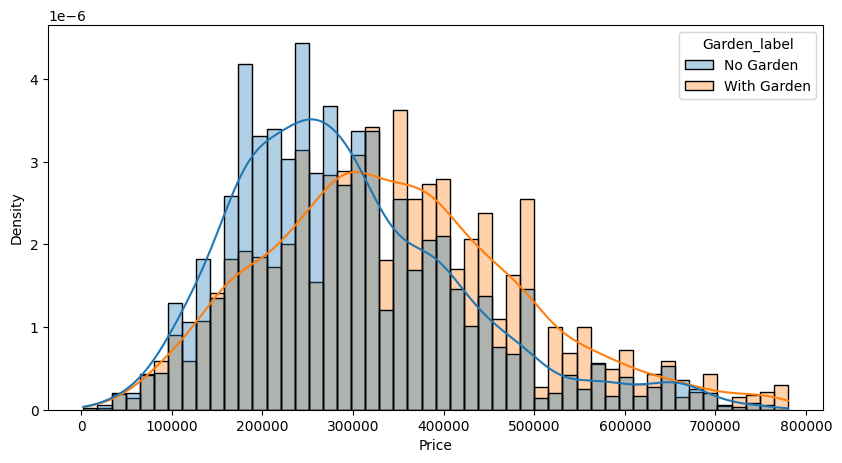

In [ ]:
# ++++++++++++++++++++++++  with outliers  ++++++++++++++++++++++++++


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# ======================
# 1. Load data
# ======================
df = pd.read_csv("clean_data_0.csv")

# ======================
# 2. Outlier removal using IQR
# ======================
def remove_outliers_iqr(data, col):
    """
    Remove outliers based on IQR for a given column.
    Outliers are values outside Q1 - 1.5*IQR and Q3 + 1.5*IQR.
    """
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    clean_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return clean_data

# Remove outliers in Price and Number of rooms
df_clean = remove_outliers_iqr(df, "Price")
df_clean = remove_outliers_iqr(df_clean, "Number of rooms")
df_clean = remove_outliers_iqr(df_clean, "Living area")

# ======================
# 3.statistics 
#  3.1.Correlation 
# ======================
corr_price_area = df_clean["Price"].corr(df_clean["Living area"])
corr_price_garden = df_clean["Price"].corr(df_clean["Garden"])

median_price = df_clean.groupby("Living area")["Price"].median()

corr_price_rooms= df_clean["Price"].corr(df_clean["Number of rooms"])
print(f"Correlation Price vs Living Area (without outliers): {corr_price_area:.2f}")
print(f"Correlation Price vs Garden (without outliers): {corr_price_garden:.2f}")
#print(f"Correlation Price vs Number of rooms (without outliers): {corr_price_rooms:.2f}")

# ======================
# 4. Visualization
# ======================

#  Scatter plot: Price vs Living Area --------------------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x="Living area", y="Price", alpha=0.6)
sns.regplot(data=df_clean, x="Living area", y="Price", scatter=False, color="red")
plt.title("Price vs Living Area (Without Outliers)")
plt.xlabel("Living Area (m²)")
plt.ylabel("Price (€)")
plt.show()

fig, ax1 = plt.subplots()
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x="Living area", y="Price", alpha=0.6, ax=ax1)
sns.regplot(data=df_clean, x="Living area", y="Price", scatter=False, color="red")
plt.title("Price vs Living Area (Without Outliers)")
plt.xlabel("Living Area (m²)")
plt.ylabel("Price (€)")
ax2=ax1.twinx()
x_positions = range(len(median_price))
ax2.plot(x_positions, median_price.values, color="green", marker="o", linewidth=1)
ax2.set_ylabel("median price per living area",color='green')
plt.show()

#Scatter plot: Price vs Number of rooms  --------------------------------------------
sns.scatterplot(data=df_clean, x="Number of rooms", y="Price", alpha=0.6)
sns.regplot(data=df_clean, x="Number of rooms", y="Price", scatter=False, color="red")
plt.title("Price vs Number of rooms (Without Outliers)")
plt.xlabel("Number of rooms")
plt.ylabel("Price (€)")
plt.show()

# Histogram: Price vs Garden ---------------------------------------------------------
plt.figure(figsize=(10,5))
sns.histplot(df_clean[df_clean["Garden"]==0]["Price"], bins=50, color='blue', label="No Garden", alpha=0.6)
sns.histplot(df_clean[df_clean["Garden"]==1]["Price"], bins=50, color='green', label="With Garden", alpha=0.6)
plt.title("Price Distribution by Garden (Without Outliers)")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.legend()
plt.show()

# Histogram: Price vs Garden = 1 ----
plt.figure(figsize=(10,5))
sns.histplot(df_clean[df_clean["Garden"]==1]["Price"], bins=50, color='green', label=" with  Garden", alpha=0.6)
plt.title("Price Distribution by Garden = 1 (with Garden)(Without Outliers)")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.legend()
plt.show()

#  Histogram: Price vs Garden = 0 ----
plt.figure(figsize=(10,5))
sns.histplot(df_clean[df_clean["Garden"]==0]["Price"], bins=50, color='blue', label="No Garden", alpha=0.6)
plt.title("Price Distribution by Garden = 0  (no Garden) (Without Outliers)")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.legend()
plt.show()



# ======================
#  Notes / Analysis Comments
# ======================
notes = """
Analysis Notes (Without Outliers):

1. Price vs Living Area
- Removing extreme values makes the linear trend clearer.
- Positive correlation remains (~0.59), indicating that price generally increases with larger living area.

2. Price vs Garden Availability
- Outliers can skew the perceived effect of having a garden.
- After removing outliers, it is easier to see that properties with a garden generally have higher prices.
- The scatter plot with trend line shows the difference in average price between the two groups.

Recommendation:
- Use these cleaned plots in reports to show clearer trends without distortion from extreme values.
"""


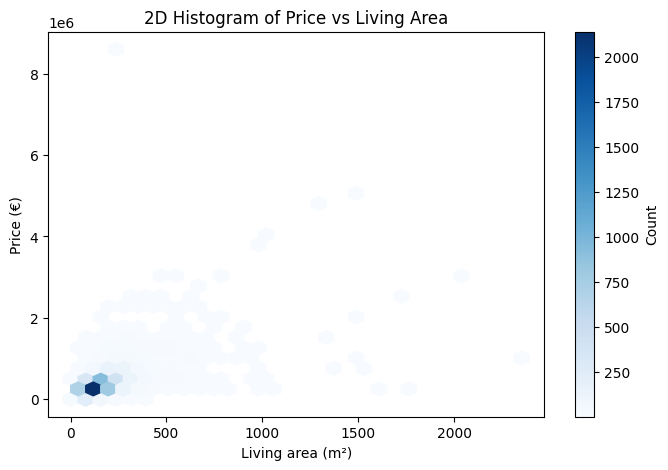

In [ ]:
plt.figure(figsize=(8,5))
plt.hexbin(df["Living area"], df["Price"], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel("Living area (m²)")
plt.ylabel("Price (€)")
plt.title("2D Histogram of Price vs Living Area")
plt.show()

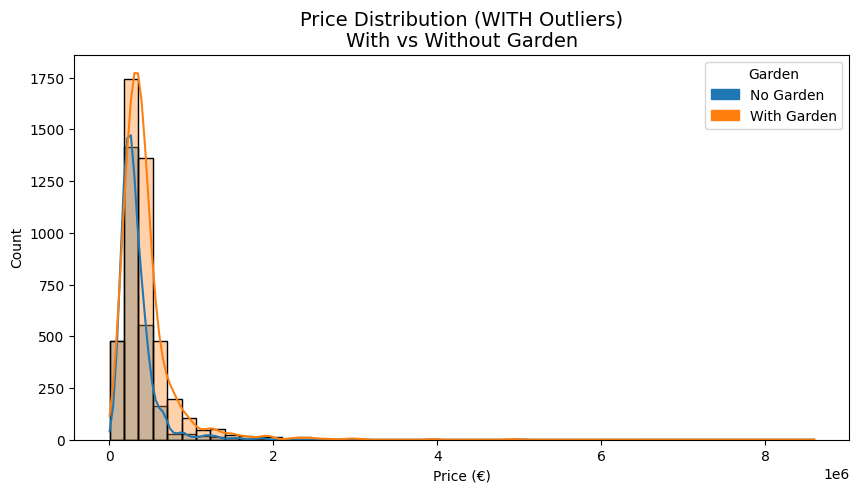

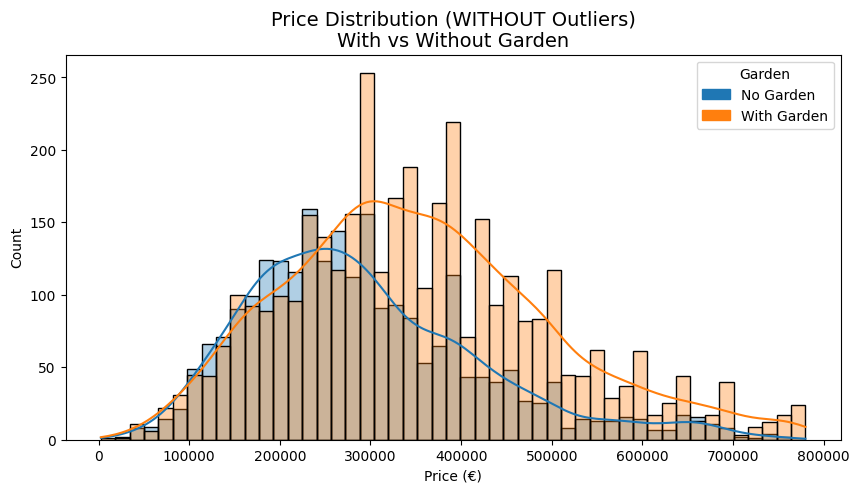

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# =====================================================
# 1. LOAD DATA
# =====================================================
df = pd.read_csv("clean_data_0.csv")

# =====================================================
# 2. OUTLIER REMOVAL (IQR METHOD)
# =====================================================
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

df_no_outliers = remove_outliers_iqr(df, "Price")
df_no_outliers = remove_outliers_iqr(df_no_outliers, "Living area")

# =====================================================
# 3. PREPARE DATA (LABELS ONLY)
# =====================================================
def prepare_data(data):
    data = data.copy()
    data["Garden_label"] = data["Garden"].map({0: "No Garden", 1: "With Garden"})
    return data

df_out = prepare_data(df)
df_clean = prepare_data(df_no_outliers)

palette = {"No Garden": "tab:blue", "With Garden": "tab:orange"}

# =====================================================
# 4. PLOTTING FUNCTION (COUNT-BASED HISTOGRAM)
# =====================================================
def plot_price_distribution(data, title):

    # Shared bins → identical x-axis
    min_price = data["Price"].min()
    max_price = data["Price"].max()
    bins = np.linspace(min_price, max_price, 50)

    plt.figure(figsize=(10,5))
    
    sns.histplot(
        data=data,
        x="Price",
        hue="Garden_label",
        bins=bins,
        kde=True,
        stat="count",     # INTEGER density (counts)
        common_norm=False,
        alpha=0.35,
        palette=palette
    )

    plt.title(title, fontsize=14)
    plt.xlabel("Price (€)")
    plt.ylabel("Count")    # integer values on Y-axis

    # Custom legend
    handles = [
        mpatches.Patch(color=palette[label], label=label)
        for label in ["No Garden", "With Garden"]
    ]
    plt.legend(handles=handles, title="Garden")
    
    plt.show()

# =====================================================
# 5. PRODUCE BOTH GRAPHS
# =====================================================

plot_price_distribution(
    df_out,
    "Price Distribution (WITH Outliers)\nWith vs Without Garden"
)

plot_price_distribution(
    df_clean,
    "Price Distribution (WITHOUT Outliers)\nWith vs Without Garden"
)

In [36]:
price_median = df["Price"].median()
living_area_median = df["Living area"].median()

print(f"Median Price: {price_median}")
print(f"Median Living Area: {living_area_median}")

price_median_clean = df_clean["Price"].median()
living_area_median_clean = df_clean["Living area"].median()

print(f"Median Price (no outliers): {price_median_clean}")
print(f"Median Living Area (no outliers): {living_area_median_clean}")

Median Price: 325000.0
Median Living Area: 140.0
Median Price (no outliers): 309750.0
Median Living Area (no outliers): 130.0
